In [4]:
import osmnx as ox
from shapely.geometry import Point
import geopandas as gpd
import overpy
from shapely.geometry import shape
from shapely.geometry import Point
import folium
from folium import Choropleth, Circle, Marker, CircleMarker
from folium.plugins import HeatMap, MarkerCluster

import osmnx as ox

import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.cm as cm

%matplotlib inline
import matplotlib.colors as mcolors
import warnings
warnings.simplefilter("ignore")

import contextily as ctx

import mplleaflet

In [158]:
def get_amenities(api, city):
    query="""area["name"=%s];node["amenity"](area);out;"""%('"'+city+'"')
    print(query)
    result = api.query(query)
    amenities=set([i.tags['amenity'] for i in result.nodes])
    return amenities, result

def get_tourism(api, city):
    query="""area["name"=%s];node["tourism"](area);out;"""%('"'+city+'"')
    print(query)
    result = api.query(query)
    amenities=set([i.tags['tourism'] for i in result.nodes])
    return amenities, result


In [1]:
amenity_weights = {
"grocery": [3],
"restaurants": [.75, .45, .25, .25, .225, .225, .225, .225, .2, .2],
"shopping": [.5, .45, .4, .35, .3],
"coffee": [1.25, .75],
"banks": [1],
"parks": [1],
"schools": [1],
"books": [1],
"entertainment": [1],
}

In [161]:
def get_name (dic):
    if 'name' in dic.keys():
        return( dic['name'])
    else:
        return ('noname')

In [319]:
ST_TONER = 'http://tile.stamen.com/toner/tileZ/tileX/tileY.png'

In [159]:
api = overpy.Overpass()

moscow_tour, results1=get_tourism(api, 'Москва')

tag_mus=['gallery', 'museum']
df_tourist=gpd.GeoDataFrame([ Point(x.lon, x.lat) for x in results1.nodes if x.tags['tourism'] in tag_mus] , columns=['geometry'])
df_tourist['facility']=[x.tags['tourism']  for x in results1.nodes if x.tags['tourism'] in tag_mus]
df_tourist=gpd.GeoDataFrame(df_tourist, crs={'init':'epsg:4326'})

area["name"="Москва"];node["tourism"](area);out;


In [162]:
df_tourist['name']=[get_name(x.tags)  for x in results1.nodes if x.tags['tourism'] in tag_mus]

In [163]:
df_tourist.head()

geometry facility  \
0  POINT (37.60330 55.74664)   museum   
1  POINT (37.60712 55.74738)   museum   
2  POINT (37.60531 55.74649)   museum   
3  POINT (37.60953 55.77495)   museum   
4  POINT (37.59690 55.74407)   museum   

                                                name  
0                                      Музей Рерихов  
1                             Отдел личных коллекций  
2                 Галерея искусства Европы и Америки  
3  Всероссийский музей декоративно-прикладного и ...  
4                  Государственный музей А.С.Пушкина

In [229]:
df_tourist[df_tourist.within(Point( 37.605086121111, 55.747286121111).buffer(0.005))]

geometry facility  \
0    POINT (37.60330 55.74664)   museum   
1    POINT (37.60712 55.74738)   museum   
2    POINT (37.60531 55.74649)   museum   
60   POINT (37.60029 55.74703)   museum   
131  POINT (37.60071 55.74619)   museum   
134  POINT (37.60043 55.74779)   museum   
206  POINT (37.60581 55.74497)   museum   
254  POINT (37.60830 55.74905)   museum   

                                                  name  
0                                        Музей Рерихов  
1                               Отдел личных коллекций  
2                   Галерея искусства Европы и Америки  
60   Московский музей современного искусства (отдел...  
131                                          Фотоцентр  
134        Музей шахмат Российской шахматной федерации  
206                                     Центр Искусств  
254                          Галерея Александра Шилова

In [211]:
f, ax = plt.subplots(figsize=(5,5))
df_tourist.to_crs(epsg='3857').plot(ax=ax, color='red')
mplleaflet.display(fig=f, crs={'init':'epsg:3857'})

In [7]:
om_mus=gpd.read_file('geo_attract.json')

In [16]:
om_mus['Caption'].unique()

array(['Дома культуры и клубы', 'Кинотеатры',
       'Аттракционы в скверах и парках', 'Библиотеки', 'Выставочные залы',
       'Концертные организации', 'Музеи', 'Объекты культурного наследия',
       'Театры', 'Границы зон охраны объектов культурного наследия',
       'Границы территорий объектов культурного наследия',
       'Поля регбийные', 'Поля футбольные', 'Стрелковые тиры',
       'Стрельбища', 'Бассейны плавательные крытые',
       'Спортивные площадки', 'Бассейны плавательные открытые',
       'Площадки пейнтбольные', 'Тренажерные городки (воркауты)',
       'Поля конно-спортивные для конкура и выездки',
       'Детские развивающие центры', 'Места для пикника',
       'Площадки для городошного спорта', 'Пешеходные зоны',
       'Учреждения, осуществляющие управленческие функции',
       'Образовательные учреждения', 'Открытые ледовые катки',
       'Ледовые поля (крытые)', 'Лыжные трассы города Москвы',
       'Выставки ледяных скульптур', 'Горнолыжные склоны',
       'Ледян

In [115]:
mkad_original=([55.78000432402266,37.84172564285271],[55.775874525970494,37.8381207618713],[55.775626746008065,37.83979446823122],[55.77446586811748,37.84243326983639],[55.771974101091104,37.84262672750849],[55.77114545193181,37.84153238623039],[55.76722010265554,37.841124690460184],[55.76654891107098,37.84239076983644],[55.76258709833121,37.842283558197025],[55.758073999993734,37.8421759312134],[55.75381499999371,37.84198330422974],[55.749277102484484,37.8416827275085],[55.74794544108413,37.84157576190186],[55.74525257875241,37.83897929098507],[55.74404373042019,37.83739676451868],[55.74298009816793,37.838732481460525],[55.743060321833575,37.841183997352545],[55.73938799999373,37.84097476190185],[55.73570799999372,37.84048155819702],[55.73228210777237,37.840095812164286],[55.73080491981639,37.83983814285274],[55.729799917464675,37.83846476321406],[55.72919751082619,37.83835745269769],[55.72859509486539,37.838636380279524],[55.727705075632784,37.8395161005249],[55.722727886185154,37.83897964285276],[55.72034817326636,37.83862557539366],[55.71944437307499,37.83559735744853],[55.71831419154461,37.835370708803126],[55.71765218986692,37.83738169402022],[55.71691750159089,37.83823396494291],[55.71547311301385,37.838056931213345],[55.71221445615604,37.836812846557606],[55.709331054395555,37.83522525396725],[55.70953687463627,37.83269301586908],[55.70903403789297,37.829667367706236],[55.70552351822608,37.83311126588435],[55.70041317726053,37.83058993121339],[55.69883771404813,37.82983872750851],[55.69718947487017,37.82934501586913],[55.69504441658371,37.828926414016685],[55.69287499999378,37.82876530422971],[55.690759754047335,37.82894754100031],[55.68951421135665,37.827697554878185],[55.68965045405069,37.82447346292115],[55.68322046195302,37.83136543914793],[55.67814012759211,37.833554015869154],[55.67295011628339,37.83544184655761],[55.6672498719639,37.837480388885474],[55.66316274139358,37.838960677246064],[55.66046999999383,37.83926093121332],[55.65869897264431,37.839025050262435],[55.65794084879904,37.83670784390257],[55.65694309303843,37.835656529083245],[55.65689306460552,37.83704060449217],[55.65550363526252,37.83696819873806],[55.65487847246661,37.83760389616388],[55.65356745541324,37.83687972750851],[55.65155951234079,37.83515216004943],[55.64979413590619,37.83312418518067],[55.64640836412121,37.82801726983639],[55.64164525405531,37.820614174591],[55.6421883258084,37.818908190475426],[55.64112490388471,37.81717543386075],[55.63916106913107,37.81690987037274],[55.637925371757085,37.815099354492155],[55.633798276884455,37.808769150787356],[55.62873670012244,37.80100123544311],[55.62554336109055,37.79598013491824],[55.62033499605651,37.78634567724606],[55.618768681480326,37.78334147619623],[55.619855533402706,37.77746201055901],[55.61909966711279,37.77527329626457],[55.618770300976294,37.77801986242668],[55.617257701952106,37.778212973541216],[55.61574504433011,37.77784818518065],[55.61148576294007,37.77016867724609],[55.60599579539028,37.760191219573976],[55.60227892751446,37.75338926983641],[55.59920577639331,37.746329965606634],[55.59631430313617,37.73939925396728],[55.5935318803559,37.73273665739439],[55.59350760316188,37.7299954450912],[55.59469840523759,37.7268679946899],[55.59229549697373,37.72626726983634],[55.59081598950582,37.7262673598022],[55.5877595845419,37.71897193121335],[55.58393177431724,37.70871550793456],[55.580917323756644,37.700497489410374],[55.57778089778455,37.69204305026244],[55.57815154690915,37.68544477378839],[55.57472945079756,37.68391050793454],[55.57328235936491,37.678803592590306],[55.57255251445782,37.6743402539673],[55.57216388774464,37.66813862698363],[55.57505691895805,37.617927457672096],[55.5757737568051,37.60443099999999],[55.57749105910326,37.599683515869145],[55.57796291823627,37.59754177842709],[55.57906686095235,37.59625834786988],[55.57746616444403,37.59501783265684],[55.57671634534502,37.593090671936025],[55.577944600233785,37.587018007904],[55.57982895000019,37.578692203704804],[55.58116294118248,37.57327546607398],[55.581550362779,37.57385012109279],[55.5820107079112,37.57399562266922],[55.58226289171689,37.5735356072979],[55.582393529795155,37.57290393054962],[55.581919415056234,37.57037722355653],[55.584471614867844,37.5592298306885],[55.58867650795186,37.54189249206543],[55.59158133551745,37.5297256269836],[55.59443656218868,37.517837865081766],[55.59635625174229,37.51200186508174],[55.59907823904434,37.506808949737554],[55.6062944994944,37.49820432275389],[55.60967103463367,37.494406071441674],[55.61066689753365,37.494760001358024],[55.61220931698269,37.49397137107085],[55.613417718449064,37.49016528606031],[55.61530616333343,37.48773249206542],[55.622640129112334,37.47921386508177],[55.62993723476164,37.470652153442394],[55.6368075123157,37.46273446298218],[55.64068225239439,37.46350692265317],[55.640794546982576,37.46050283203121],[55.64118904154646,37.457627470916734],[55.64690488145138,37.450718034393326],[55.65397824729769,37.44239252645875],[55.66053543155961,37.434587576721185],[55.661693766520735,37.43582144975277],[55.662755031737014,37.43576786245721],[55.664610641628116,37.430982915344174],[55.66778515273695,37.428547447097685],[55.668633314343566,37.42945134592044],[55.66948145750025,37.42859571562949],[55.670813882451405,37.4262836402282],[55.6811141674414,37.418709037048295],[55.68235377885389,37.41922139651101],[55.68359335082235,37.419218771842885],[55.684375235224735,37.417196501327446],[55.68540557585352,37.41607020370478],[55.68686637150793,37.415640857147146],[55.68903015131686,37.414632153442334],[55.690896881757396,37.413344899475064],[55.69264232162232,37.41171432275391],[55.69455101638112,37.40948282275393],[55.69638690385348,37.40703674603271],[55.70451821283731,37.39607169577025],[55.70942491932811,37.38952706878662],[55.71149057784176,37.387778313491815],[55.71419814298992,37.39049275399779],[55.7155489617061,37.385557272491454],[55.71849856042102,37.38388335714726],[55.7292763261685,37.378368238098155],[55.730845879211614,37.37763597123337],[55.73167906388319,37.37890062088197],[55.734703664681774,37.37750451918789],[55.734851959522246,37.375610832015965],[55.74105626086403,37.3723813571472],[55.746115620904355,37.37014935714723],[55.750883999993725,37.36944173016362],[55.76335905525834,37.36975304365541],[55.76432079697595,37.37244070571134],[55.76636979670426,37.3724259757175],[55.76735417953104,37.369922155757884],[55.76823419316575,37.369892695770275],[55.782312184391266,37.370214730163575],[55.78436801120489,37.370493611114505],[55.78596427165359,37.37120164550783],[55.7874378183096,37.37284851456452],[55.7886695054807,37.37608325135799],[55.78947647305964,37.3764587460632],[55.79146512926804,37.37530000265506],[55.79899647809345,37.38235915344241],[55.80113596939471,37.384344043655396],[55.80322699999366,37.38594269577028],[55.804919036911976,37.38711208598329],[55.806610999993666,37.3880239841309],[55.81001864976979,37.38928977249147],[55.81348641242801,37.39038389947512],[55.81983538336746,37.39235781481933],[55.82417822811877,37.393709457672124],[55.82792275755836,37.394685720901464],[55.830447148154136,37.39557615344238],[55.83167107969975,37.39844478226658],[55.83151823557964,37.40019761214057],[55.83264967594742,37.400398790382326],[55.83322180909622,37.39659544313046],[55.83402792148566,37.39667059524539],[55.83638877400216,37.39682089947515],[55.83861656112751,37.39643489154053],[55.84072348043264,37.3955338994751],[55.84502158126453,37.392680272491454],[55.84659117913199,37.39241188227847],[55.84816071336481,37.392529730163616],[55.85288092980303,37.39486835714723],[55.859893456073635,37.39873052645878],[55.86441833633205,37.40272161111449],[55.867579567544375,37.40697072750854],[55.868369880337,37.410007082016016],[55.86920843741314,37.4120992989502],[55.87055369615854,37.412668021163924],[55.87170587948249,37.41482461111453],[55.873183961039565,37.41862266137694],[55.874879126654704,37.42413732540892],[55.875614937236705,37.4312182698669],[55.8762723478417,37.43111093783558],[55.87706546369396,37.43332105622856],[55.87790681284802,37.43385747619623],[55.88027084462084,37.441303050262405],[55.87942070143253,37.44747234260555],[55.88072960917233,37.44716141796871],[55.88121221323979,37.44769797085568],[55.882080694420715,37.45204320500181],[55.882346110794586,37.45673176190186],[55.88252729504517,37.463383999999984],[55.88294937719063,37.46682797486874],[55.88361266759345,37.470014457672086],[55.88546991372396,37.47751410450743],[55.88534929207307,37.47860317658232],[55.882563306475106,37.48165826025772],[55.8815803226785,37.48316434442331],[55.882427612793315,37.483831555817645],[55.88372791409729,37.483182967125686],[55.88495581062434,37.483092277908824],[55.8875561994203,37.4855716508179],[55.887827444039566,37.486440636245746],[55.88897899871799,37.49014203439328],[55.890208937135604,37.493210285705544],[55.891342397444696,37.497512451065035],[55.89174030252967,37.49780744510645],[55.89239745507079,37.49940333499519],[55.89339220941865,37.50018383334346],[55.903869074155224,37.52421672750851],[55.90564076517974,37.52977457672118],[55.90661661218259,37.53503220370484],[55.90714113744566,37.54042858064267],
                                                                    [55.905645048442985,37.54320461007303],[55.906608607018505,37.545686966066306],[55.90788552162358,37.54743976120755],[55.90901557907218,37.55796999999999],[55.91059395704873,37.572711542327866],[55.91073854155573,37.57942799999998],[55.91009969268444,37.58502865872187],[55.90794809960554,37.58739968913264],[55.908713267595054,37.59131567193598],[55.902866854295375,37.612687423278814],[55.90041967242986,37.62348079629517],[55.898141151686396,37.635797880950896],[55.89639275532968,37.649487626983664],[55.89572360207488,37.65619302513125],[55.895295577183965,37.66294133862307],[55.89505457604897,37.66874564418033],[55.89254677027454,37.67375601586915],[55.8947775867987,37.67744661901856],[55.89450045676125,37.688347],[55.89422926332761,37.69480554232789],[55.89322256101114,37.70107096560668],[55.891763491662616,37.705962965606716],[55.889110234998974,37.711885134918205],[55.886577568759876,37.71682005026245],[55.88458159806678,37.7199315476074],[55.882281005794134,37.72234560316464],[55.8809452036196,37.72364385977171],[55.8809722706006,37.725371142837474],[55.88037213862385,37.727870902099546],[55.877941504088696,37.73394330422971],[55.87208120378722,37.745339592590376],[55.86703807949492,37.75525267724611],[55.859821640197474,37.76919976190188],[55.82962968399116,37.827835219574],[55.82575289922351,37.83341438888553],[55.82188784027888,37.83652584655761],[55.81612575504693,37.83809213491821],[55.81460347077685,37.83605359521481],[55.81276696067908,37.83632178569025],[55.811486181656385,37.838623105812026],[55.807329380532785,37.83912198147584],[55.80510270463816,37.839079078033414],[55.79940712529036,37.83965844708251],[55.79131399999368,37.840581150787344],[55.78000432402266,37.84172564285271])

new_coords=[ [i,j] for i,j in zip(np.array(mkad_original)[:, 1], np.array(mkad_original)[:, 0])]

mkad=shape({ "type": "Polygon", "crs":"epsg=4326", "coordinates": [new_coords]})

In [8]:
om_mus_mos=om_mus[om_mus['Caption']=='Музеи'][om_mus[om_mus['Caption']=='Музе
                                                     
                                                     и'].within(mkad)]

NameError: name 'mkad' is not defined

In [94]:
om_mus_mos['buf']=om_mus_mos.to_crs(epsg='3857')['geometry'].buffer(50)

In [98]:
#выявляем повторы
index_drop=gpd.sjoin(om_mus_mos.set_geometry('buf'), df_tourist.to_crs(epsg='3857'))['index_right']

In [108]:
df_tourist1=df_tourist.loc[[i for i in list(df_tourist.index) if i not in index_drop]]

In [109]:
om_mus_mos.head()

properties     type Caption  \
620  {'DatasetId': 529, 'VersionNumber': 3, 'Releas...  Feature   Музеи   
621  {'DatasetId': 529, 'VersionNumber': 3, 'Releas...  Feature   Музеи   
622  {'DatasetId': 529, 'VersionNumber': 3, 'Releas...  Feature   Музеи   
623  {'DatasetId': 529, 'VersionNumber': 3, 'Releas...  Feature   Музеи   
624  {'DatasetId': 529, 'VersionNumber': 3, 'Releas...  Feature   Музеи   

     CategoryId  DepartmentId  dataset_id    global_id  \
620           5             8         529  477012216.0   
621           5             8         529  477012236.0   
622           5             8         529  477012248.0   
623           5             8         529  477012261.0   
624           5             8         529  477012337.0   

                                                  Name DisabilityFriendly  \
620                    Мемориальная квартира А. Белого               None   
621                            Музей археологии Москвы               None   
622      Музейно - выставочный Центр В.А. Гиляровского               None   
623                    Мемориальный музей космонавтики               None   
624  Выставочный зал Музея русского лубка и наивног...               None   

     open_hour  ...  0  1  2  3  4  5  6                        geometry area  \
620         13  ...  0  0  1  1  1  1  1  MULTIPOINT (37.58542 55.74712)  0.0   
621         11  ...  0  1  1  1  1  1  1  MULTIPOINT (37.61719 55.75632)  0.0   
622         11  ...  0  1  1  1  1  1  1  MULTIPOINT (37.61536 55.76344)  0.0   
623         10  ...  0  1  1  1  1  1  1  MULTIPOINT (37.63975 55.82275)  0.0   
624         12  ...  0  0  1  1  1  1  1  MULTIPOINT (37.79535 55.79605)  0.0   

                                                   buf  
620  POLYGON ((4184039.879 7508238.026, 4184039.639...  
621  POLYGON ((4187576.821 7510057.738, 4187576.580...  
622  POLYGON ((4187372.352 7511467.395, 4187372.111...  
623  POLYGON ((4190087.474 7523210.428, 4190087.233...  
624  POLYGON ((4207408.950 7517921.397, 4207408.709...  

[5 rows x 21 columns]

In [117]:
df_mus_dataset=pd.concat([om_mus_mos.rename(columns={'Name':'name'})[['name','geometry']], df_tourist[['name','geometry']]])

In [121]:
df_mus_dataset=df_mus_dataset[df_mus_dataset.within(mkad)]

In [131]:
df_mus_dataset['50_m']=df_mus_dataset.to_crs(epsg='3857').geometry.buffer(50)

In [142]:
df_mus_dataset.reset_index(inplace=True)

In [152]:
df_mus_dataset.drop('index',inplace=True, axis=1)

In [166]:
# 
ind_count=pd.Series(gpd.sjoin(df_mus_dataset.set_geometry('50_m'), df_mus_dataset.to_crs(epsg='3857')).groupby('index_right').size(), name='dup_count').reset_index()

In [170]:
df_dup=gpd.sjoin(df_mus_dataset.set_geometry('50_m'), df_mus_dataset.to_crs(epsg='3857')).merge(ind_count, on='index_right')

In [185]:
df_dup['rank']=df_dup.groupby('index_right').rank(method='first')

In [193]:
df_fin_mus=df_dup[df_dup['rank']==1][['name_left','geometry']].drop_duplicates()

In [196]:
df_fin_mus=gpd.GeoDataFrame(df_fin_mus, geometry='geometry')

In [204]:
df_fin_mus['long']=df_fin_mus['geometry'].centroid.x
df_fin_mus['lat']=df_fin_mus['geometry'].centroid.y

In [206]:
df_fin_mus[['name_left','long','lat']].to_csv('museum_list.csv')

In [210]:
[i for i in df_tourist['name'] if 'Третьяк' in i]

['Новая Третьяковка']

<AxesSubplot:>

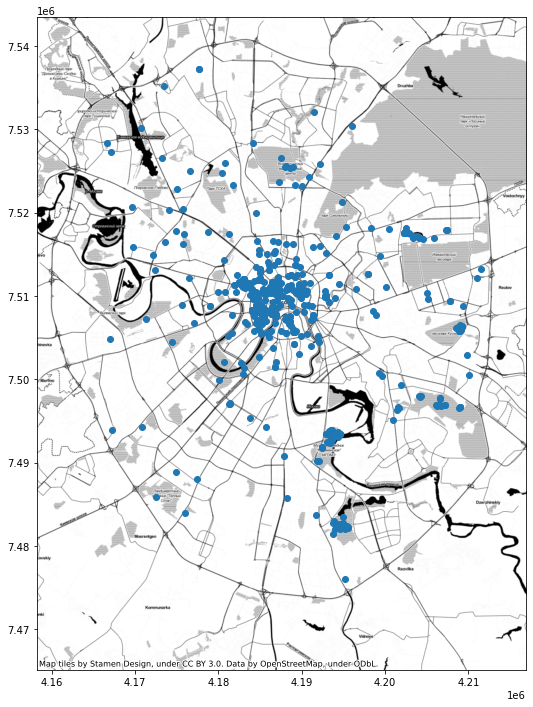

In [124]:
fig,ax=plt.subplots(figsize=(12,12))
df_mus_dataset.to_crs(epsg='3857').plot(ax=ax)
ctx.add_basemap(ax, url=ST_TONER)

In [5]:
vdnh_area=shape({ "type": "Polygon", "crs":"epsg=4326", "coordinates":[[[37.600519, 55.821395], [37.600519, 55.846854], [37.642085, 55.846854], [37.642085, 55.821395], [37.600519, 55.821395]]]})

In [ ]:
v_ind=om_mus.intersects(vdnh_area)

<AxesSubplot:>

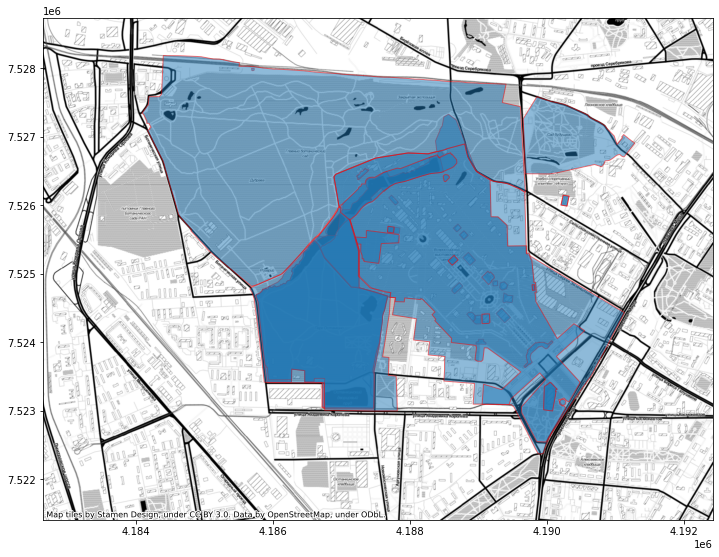

In [43]:
fig,ax=plt.subplots(figsize=(12,12))
om_mus[(v_ind)&(om_mus['Caption']=='Границы территорий объектов культурного наследия')].to_crs(epsg='3857').plot(ax=ax, alpha=0.5, column='Caption', edgecolor='red' )
ctx.add_basemap(ax,zoom=15 , url=ST_TONER )

In [45]:
om_mus['area']=om_mus.area

In [51]:
vdnh_board=om_mus[(v_ind)&(om_mus['Caption']=='Границы территорий объектов культурного наследия')&(om_mus['area']>0.0001)]

In [61]:
vdnh_board.sort_values('area')

properties     type  \
11901  {'DatasetId': 614, 'VersionNumber': 4, 'Releas...  Feature   
10833  {'DatasetId': 614, 'VersionNumber': 4, 'Releas...  Feature   
12621  {'DatasetId': 614, 'VersionNumber': 4, 'Releas...  Feature   
12668  {'DatasetId': 614, 'VersionNumber': 4, 'Releas...  Feature   
11545  {'DatasetId': 614, 'VersionNumber': 4, 'Releas...  Feature   
11300  {'DatasetId': 614, 'VersionNumber': 4, 'Releas...  Feature   
12543  {'DatasetId': 614, 'VersionNumber': 4, 'Releas...  Feature   

                                                Caption  CategoryId  \
11901  Границы территорий объектов культурного наследия           5   
10833  Границы территорий объектов культурного наследия           5   
12621  Границы территорий объектов культурного наследия           5   
12668  Границы территорий объектов культурного наследия           5   
11545  Границы территорий объектов культурного наследия           5   
11300  Границы территорий объектов культурного наследия           5   
12543  Границы территорий объектов культурного наследия           5   

       DepartmentId  dataset_id    global_id  \
11901             7         614  912031454.0   
10833             7         614   19659203.0   
12621             7         614  930074600.0   
12668             7         614  930074740.0   
11545             7         614  912030921.0   
11300             7         614  901669136.0   
12543             7         614  930074433.0   

                                    Name DisabilityFriendly  open_hour  \
11901  Усадьба Останкино, конец XVIII в.               None          0   
10833  Усадьба Останкино, конец XVIII в.               None          0   
12621                  Усадьба Останкино               None          0   
12668  Охранная зона «Усадьба Останкино»               None          0   
11545                  ВСХВ - ВДНХ - ВВЦ               None          0   
11300       Зона регулирования застройки               None          0   
12543             Охранные зоны 302, 304               None          0   

       close_hour  0  1  2  3  4  5  6  \
11901          24  1  1  1  1  1  1  1   
10833          24  1  1  1  1  1  1  1   
12621          24  1  1  1  1  1  1  1   
12668          24  1  1  1  1  1  1  1   
11545          24  1  1  1  1  1  1  1   
11300          24  1  1  1  1  1  1  1   
12543          24  1  1  1  1  1  1  1   

                                                geometry      area  
11901  POLYGON ((37.60566 55.83132, 37.60568 55.83134...  0.000134  
10833  POLYGON ((37.60566 55.83132, 37.60568 55.83134...  0.000134  
12621  POLYGON ((37.62545 55.83923, 37.62449 55.83918...  0.000174  
12668  POLYGON ((37.61691 55.82166, 37.61022 55.82171...  0.000178  
11545  POLYGON ((37.64376 55.82377, 37.64228 55.82234...  0.000339  
11300  POLYGON ((37.62859 55.84134, 37.62888 55.84066...  0.000430  
12543  MULTIPOLYGON (((37.58904 55.84786, 37.58953 55...  0.000518

<AxesSubplot:>

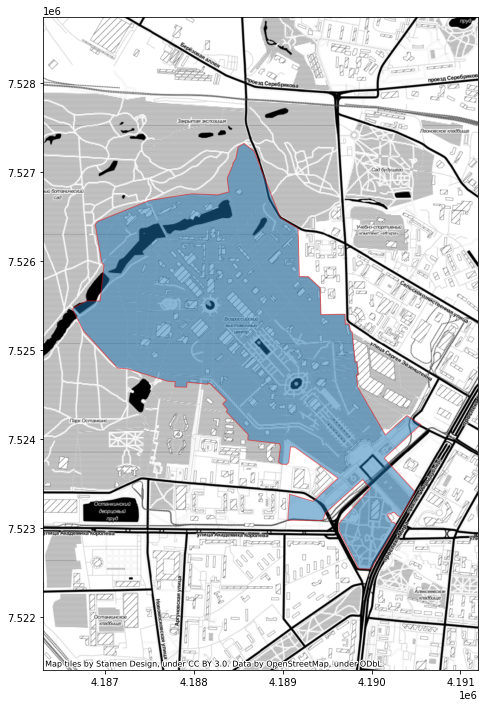

In [59]:
fig,ax=plt.subplots(figsize=(12,12))
vdnh_board.loc[[11545]].to_crs(epsg='3857').plot(ax=ax, alpha=0.5, column='Caption', edgecolor='red' )
ctx.add_basemap(ax,zoom=15 , url=ST_TONER )

<AxesSubplot:>

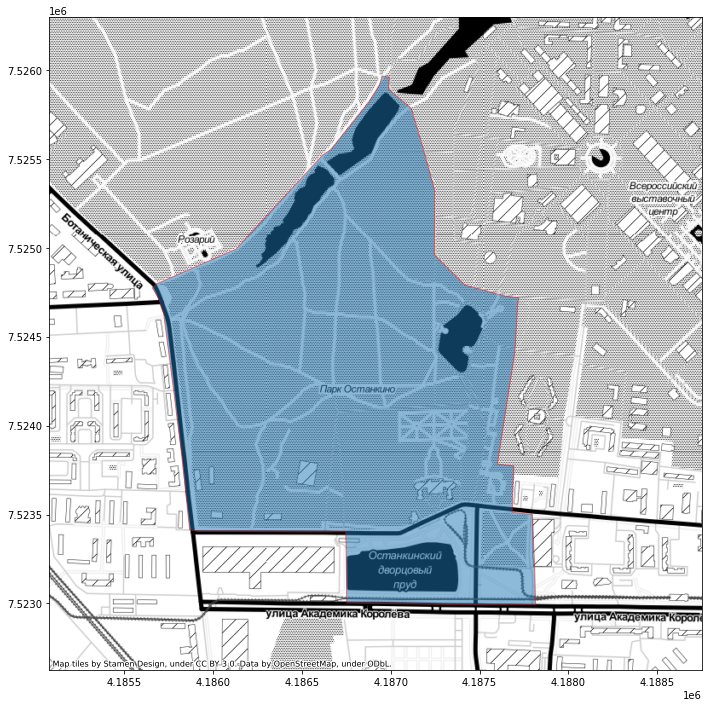

In [62]:
fig,ax=plt.subplots(figsize=(12,12))
vdnh_board.loc[[12668]].to_crs(epsg='3857').plot(ax=ax, alpha=0.5, column='Caption', edgecolor='red' )
ctx.add_basemap(ax,zoom=15 , url=ST_TONER )

In [236]:
vdnh_area=vdnh_board.loc[12543].geometry.union(vdnh_board.loc[ 11545].geometry)

<AxesSubplot:>

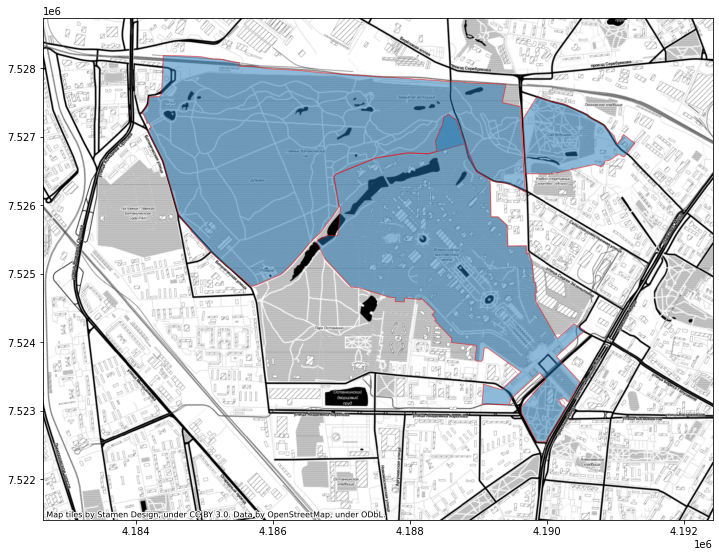

In [230]:
fig,ax=plt.subplots(figsize=(12,12))
vdnh_board.loc[[12543, 11545]].to_crs(epsg='3857').plot(ax=ax, alpha=0.5, column='Caption', edgecolor='red' )
ctx.add_basemap(ax,zoom=15 , url=ST_TONER )

In [9]:
vdnh = ox.graph_from_polygon(vdnh_area, network_type='walk' )

In [45]:
g_vdnh=ox.project_graph(vdnh,to_crs={'init':'epsg:3857'})
betw_centr=nx.betweenness_centrality(nx.DiGraph(g_vdnh))

(array([397., 303., 161., 741., 726., 218., 772., 280., 458., 121.]),
 array([6.07208930e+07, 8.40274234e+08, 1.61982757e+09, 2.39938092e+09,
        3.17893426e+09, 3.95848760e+09, 4.73804094e+09, 5.51759428e+09,
        6.29714762e+09, 7.07670096e+09, 7.85625430e+09]),
 <BarContainer object of 10 artists>)

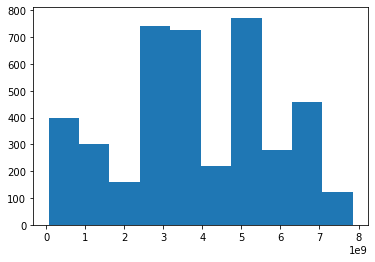

In [46]:
plt.hist(betw_centr)

In [42]:
def get_color_array(centrality):
    norm = mpl.colors.Normalize(vmin=min(centrality.values()), vmax=max(centrality.values()))
    cmap = cm.plasma
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    col_ar=[ m.to_rgba(x) for x in centrality.values() ]
    return m, col_ar

In [244]:
m_nbc,node_betw_col=get_color_array(betw_centr)

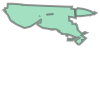

In [252]:
# x,y =
vdnh_area

<AxesSubplot:>

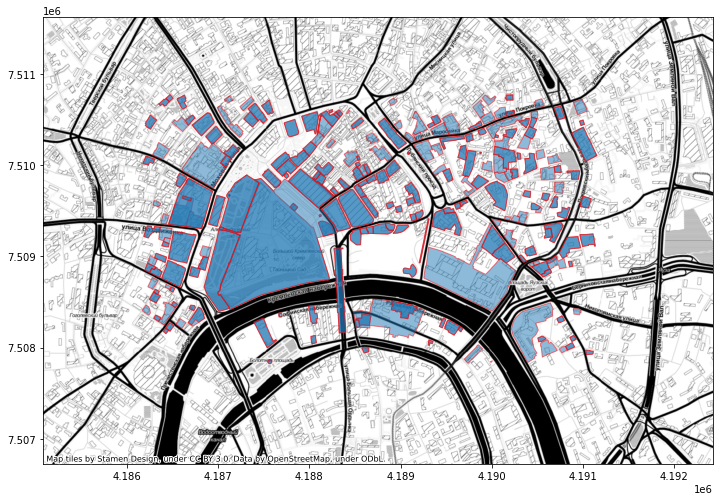

In [28]:
fig,ax=plt.subplots(figsize=(12,12))
om_mus[zar_ind&(om_mus['Caption']=='Границы территорий объектов культурного наследия')].to_crs(epsg='3857').plot(ax=ax, alpha=0.5, column='Caption', edgecolor='red' )
ctx.add_basemap(ax,zoom=15 , url=ST_TONER )

In [30]:
zar_g=ox.graph_from_polygon(zaryad_area)

In [31]:
g_zar=ox.project_graph(zar_g,to_crs={'init':'epsg:3857'})
z_betw_centr=nx.betweenness_centrality(nx.DiGraph(g_zar))

In [ ]:
df_mus

(array([ 304., 1184.,  438.,  871.,  251.,  596., 1097.,  348.,  706.,
          57.]),
 array([3.58810700e+07, 8.13060196e+08, 1.59023932e+09, 2.36741845e+09,
        3.14459757e+09, 3.92177670e+09, 4.69895583e+09, 5.47613495e+09,
        6.25331408e+09, 7.03049320e+09, 7.80767233e+09]),
 <BarContainer object of 10 artists>)

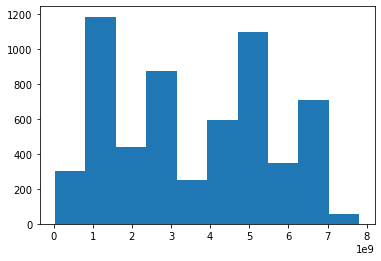

In [37]:
plt.hist(z_betw_centr)

In [43]:
m_znbc,z_node_betw_col=get_color_array(z_betw_centr)

In [53]:
g_zar.nodes[4187602944]#, 2582085638]]

{'y': 7509975.8544870205,
 'x': 4187395.145666382,
 'osmid': 4187602944,
 'lon': 37.6160106,
 'lat': 55.7559047}

In [181]:
# вытащить все музеи
# для каждого определить полигон, скачать -загрузить

<AxesSubplot:>

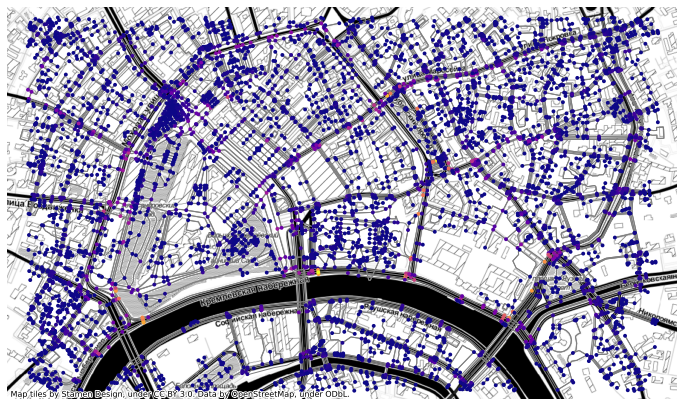

In [44]:
fig, ax = ox.plot_graph(g_zar, show=False, close=False, edge_color='grey', bgcolor='white', figsize=(12,12), node_color=z_node_betw_col, node_size=15)
# df_tourist[df_tourist['is_vdnh']].to_crs(epsg='3857').plot(ax=ax, markersize = 40, color="red" , alpha=1, zorder=7)
# ax.plot()
ctx.add_basemap(ax,zoom=15 , url=ST_TONER )

In [63]:
om_mus

properties     type  \
0      {'DatasetId': 493, 'VersionNumber': 3, 'Releas...  Feature   
1      {'DatasetId': 493, 'VersionNumber': 3, 'Releas...  Feature   
2      {'DatasetId': 493, 'VersionNumber': 3, 'Releas...  Feature   
3      {'DatasetId': 493, 'VersionNumber': 3, 'Releas...  Feature   
4      {'DatasetId': 493, 'VersionNumber': 3, 'Releas...  Feature   
...                                                  ...      ...   
30981  {'DatasetId': 61801, 'VersionNumber': 1, 'Rele...  Feature   
30982  {'DatasetId': 61801, 'VersionNumber': 1, 'Rele...  Feature   
30983  {'DatasetId': 61801, 'VersionNumber': 1, 'Rele...  Feature   
30984  {'DatasetId': 61801, 'VersionNumber': 1, 'Rele...  Feature   
30985  {'DatasetId': 61801, 'VersionNumber': 1, 'Rele...  Feature   

                                                 Caption  CategoryId  \
0                                  Дома культуры и клубы           5   
1                                  Дома культуры и клубы           5   
2                                  Дома культуры и клубы           5   
3                                  Дома культуры и клубы           5   
4                                  Дома культуры и клубы           5   
...                                                  ...         ...   
30981  Зимние активности парков, подведомственных Деп...         162   
30982  Зимние активности парков, подведомственных Деп...         162   
30983  Зимние активности парков, подведомственных Деп...         162   
30984  Зимние активности парков, подведомственных Деп...         162   
30985  Зимние активности парков, подведомственных Деп...         162   

       DepartmentId  dataset_id     global_id  \
0                 8         493  4.770122e+08   
1                 8         493  4.770122e+08   
2                 8         493  4.770123e+08   
3                 8         493  4.770123e+08   
4                 8         493  4.770123e+08   
...             ...         ...           ...   
30981             8       61801  1.021762e+09   
30982             8       61801  1.021762e+09   
30983             8       61801  1.021762e+09   
30984             8       61801  1.021762e+09   
30985             8       61801  1.021762e+09   

                                                  Name DisabilityFriendly  \
0                        Культурный центр «Ивановский»               None   
1           Экспериментальный центр «Творческий лицей»               None   
2      Московский многофункциональный культурный центр               None   
3                           Культурный центр «Москвич»               None   
4                              Дом культуры «Гармония»               None   
...                                                ...                ...   
30981                                             None               None   
30982                                             None               None   
30983                                             None               None   
30984                                             None               None   
30985                                             None               None   

       open_hour  close_hour  0  1  2  3  4  5  6  \
0             10          22  1  1  1  1  1  1  1   
1             12          18  1  1  1  1  1  1  0   
2              9          21  1  1  1  1  1  1  1   
3              9          22  1  1  1  1  1  1  1   
4             10          19  1  1  1  1  1  1  1   
...          ...         ... .. .. .. .. .. .. ..   
30981         11          22  1  1  1  1  1  1  1   
30982         13          13  1  1  1  1  1  1  1   
30983         10          21  1  1  1  1  1  1  1   
30984         10          22  1  1  1  1  1  1  1   
30985         10          22  1  1  1  1  1  1  1   

                                                geometry  
0                         MULTIPOINT (37.82087 55.75880)  
1      MULTIPOINT (37.17137 55.98769, 37.18698 55.976...  
2      MULTIPOINT (37.71

In [185]:
df_mus=gpd.read_file(r'C:\Users\Intra24\Desktop\travel_museum_startup\список_музеев.csv')

In [189]:
df_mus['geometry']=[ Point (float(i),float(j)) for i,j in zip(df_mus['long'], df_mus['lat'])]

In [194]:
fish_500=gpd.read_file(r'C:\Users\Intra24\Desktop\Glasgow_uni\Dissertation and Smart Museums\gis\fishnet.shp')

In [196]:
df_mus_fish=gpd.sjoin(left_df=df_mus, right_df=fish_500)

In [197]:
df_mus_fish.to_csv(r'C:\Users\Intra24\Desktop\travel_museum_startup\mus_fish.csv')

In [203]:
df_mus_fish.crs=4326

In [207]:
df_mus_fish['7_km_poligon']=df_mus_fish.to_crs(epsg='3857').geometry.buffer(7000)
df_mus_fish['5_km_poligon']=df_mus_fish.to_crs(epsg='3857').geometry.buffer(5000)

In [213]:
df_mus_fish['5_km_4326']=df_mus_fish['5_km_poligon'].to_crs(epsg='4326')
df_mus_fish['7_km_4326']=df_mus_fish['7_km_poligon'].to_crs(epsg='4326')

In [ ]:
df_mus_fish

In [219]:
df_mus_fish.shape

(282, 10)

In [227]:
mosc_nodes=gpd.read_file(r'C:\Users\Intra24\Moscow_nodes.shp')

In [229]:
import gc
gc.collect()

16221

In [234]:
df_mus_fish.drop('index_right', axis=1, inplace=True)

In [239]:
g_mos_walk=ox.graph_from_place('Moscow, Russia', network_type='walk')

In [244]:
g_mos_pr=ox.project_graph(g_mos_walk, to_crs='epsg:3857')

In [245]:
travel_speed=4
l=[]
meters_per_minute = travel_speed * 1000 / 60 #km per hour to m per minute
for u, v, k, data in g_mos_pr.edges(data=True, keys=True):
    l.append(data['length'])
    data['time'] = data['length'] / meters_per_minute

In [235]:
big_df=gpd.sjoin(mosc_nodes[['osmid','geometry']],df_mus_fish.set_geometry('5_km_4326'),op='within')

In [312]:
big_df['osmid'].nunique()

294627

In [314]:
mosc_nodes['osmid'].nunique()

368720

In [265]:
dic_graph=dict()
trip_time=15 #1km
for mus,lat,long in zip(big_df.index_right.unique(),big_df.lat.unique(),big_df.long.unique()):
    
    subg=g_mos_walk.subgraph(big_df[big_df.index_right==mus]['osmid'].values)
    print(len(subg.nodes))
    mus_node = ox.get_nearest_node(subg, (float(lat), float(long)), method='euclidean')
    subg_3857=g_mos_pr.subgraph(big_df[big_df.index_right==mus]['osmid'].values)
    subg_15m = nx.ego_graph(subg_3857, mus_node, radius=trip_time, distance='time')
    dic_graph[mus]={'mus_node':mus_node,'graph_15m':subg_15m}

8275
19123
8390
11203
11210
11323
14212
21594
18075
25761
26957
27104
24682
23278
22687
18595
22743
24044
17202
15443
12102
23852
12291
25031
19277
26950
20108
28678
27835
27452
10755
16968
18227
8340
27157
29107
25994
24862
16630
7907
8596
7369
19492
3751
10599
10016
11732
12603
11617
12038
28549
29721
30316
25380
26685
28258
29151
19483
30400
30869
30523
30798
23955
26820
24271
24371
24162
31179
31222
25397
26321
25773
25454
25399
31191
30717
22309
29330
29327
30030
31064
31071
31062
31020
31193
31004
30523
31124
31105
30788
31140
30193
30206
30320
28053
26643
26652
26473
26885
27783
27404
28329
27640
26777
26701
28077
28720
29051
29802
29217
28932
24569
26244
24737
24956
24543
24276
24893
24916
26036
26011
26874
26113
26045
27266
26505
30639
30020
29755
25367
27871
27122
27140
27692
27521
26309
25977
28008
27744
27598
26566
27559
21345
29368
24828
30761
30518
25358
27705
23486
22623
28526
19966
7447
7513
5786
7621
7218
19621
6019
12912
25019
25945
23425
18299
17280
13985
15145
15115

In [270]:
mus_nodes=[ d['mus_node'] for d in dic_graph.values()]

In [292]:
all_15_nodes=[]
for d in dic_graph.values():
    all_15_nodes=all_15_nodes+list(d['graph_15m'].nodes)

In [317]:
all_15_nodes=list(set(all_15_nodes))

In [318]:
len(set(g_mos_pr.nodes))

369910

In [298]:
vdnh_nodes=pd.read_csv(r'C:\Users\Intra24\vdnh_nodes.csv')

In [302]:
vdnh_nodes.columns=['index','node']

In [307]:
l_vdnh_nodes=vdnh_nodes['node'].values.tolist()

In [1]:
nc = ['r' if node in mus_nodes else ('yellow' if node in all_15_nodes else 'none') for node in list(g_mos_pr.nodes)]

NameError: name 'g_mos_pr' is not defined

In [321]:
# get one color for each isochrone
nc = ['r' if node in mus_nodes else ('yellow' if node in all_15_nodes else 'none') for node in list(g_mos_pr.nodes)]
# ns = [15 if node in all_15_nodes else 0 for node in g_mos_pr.nodes]
fig, ax = ox.plot_graph(g_mos_pr, node_color=nc, node_size=ns, close=False, show=False, node_alpha=0.8, node_zorder=2,
                        bgcolor='white', edge_linewidth=0.2, edge_color='black', figsize=(17,17))
# df_tourist[df_tourist['name']=='Музей кино'].to_crs(epsg=3857).plot(ax=ax,markersize = 40, color="red" )
ctx.add_basemap(ax,zoom=15 , url=ST_TONER )

KeyboardInterrupt: 

In [ ]:
# построить полигоны

In [ ]:
# make the isochrone polygons
isochrone_polys = []
for trip_time in sorted(trip_times, reverse=True):
    subgraph = nx.ego_graph(vdnh_3857, kino_node, radius=trip_time, distance='time')
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
    isochrone_polys.append(bounding_poly)

In [257]:
big_df['name'].nunique()

277

In [240]:
g_mos_walk.subgraph(big_df[big_df.name==mus]['osmid'].values)

In [5]:
df_1407=gpd.read_file(r'C:\Users\Intra24\Desktop\Glasgow_uni\Dissertation and Smart Museums\Moscow_datasets\data-4275-2020-07-14.csv')

In [15]:
df_1407['geometry']=[ Point(float(i),float(j)) for i, j in zip(df_1407['Longitude_WGS84'], df_1407['Latitude_WGS84'])]

In [26]:
from shapely.geometry import shape

In [39]:
df_1404=gpd.read_file(r'C:\Users\Intra24\Desktop\Glasgow_uni\Dissertation and Smart Museums\Moscow_datasets\data-4275-2020-04-14.csv')

In [69]:
df_2101=gpd.read_file(r'C:\Users\Intra24\Desktop\Glasgow_uni\Dissertation and Smart Museums\Moscow_datasets\data-4275-2020-01-21.csv')

In [41]:
df_1404['geometry']=[ Point(float(i),float(j)) for i, j in zip(df_1404['Longitude_WGS84'], df_1404['Latitude_WGS84'])]

In [74]:
df_2101['geometry']=[ Point(float(i),float(j)) for i, j in zip(df_2101['Longitude_WGS84'], df_2101['Latitude_WGS84'])]

In [42]:
df_1404.shape

(16483, 16)

In [43]:
df_1407.shape

(16359, 16)

In [51]:
df_1407.crs={'init':'epsg:4326'}

In [55]:
df_1404.crs={'init':'epsg:4326'}

In [75]:
df_2101.crs={'init':'epsg:4326'}

In [46]:
fish_5km=gpd.read_file(r'C:\Users\Intra24\Desktop\Glasgow_uni\Dissertation and Smart Museums\gis\5000_grid.shp')

In [54]:
f5m_july=gpd.sjoin(left_df=fish_5km, right_df=df_1407.to_crs(epsg='3857'))

In [56]:
f5m_april=gpd.sjoin(left_df=fish_5km, right_df=df_1404.to_crs(epsg='3857'))

In [57]:
f5m_july.head()

left           top         right        bottom  id  \
0  4.159722e+06  7.540673e+06  4.164722e+06  7.535673e+06   1   
0  4.159722e+06  7.540673e+06  4.164722e+06  7.535673e+06   1   
0  4.159722e+06  7.540673e+06  4.164722e+06  7.535673e+06   1   
0  4.159722e+06  7.540673e+06  4.164722e+06  7.535673e+06   1   
0  4.159722e+06  7.540673e+06  4.164722e+06  7.535673e+06   1   

                                            geometry  index_right         ID  \
0  POLYGON ((4159722.469 7540673.086, 4164722.469...        13578  000022876   
0  POLYGON ((4159722.469 7540673.086, 4164722.469...         5269  000022778   
0  POLYGON ((4159722.469 7540673.086, 4164722.469...         1395   00119830   
0  POLYGON ((4159722.469 7540673.086, 4164722.469...         1394  000020177   
0  POLYGON ((4159722.469 7540673.086, 4164722.469...         1263  000019647   

             Name   global_id  ... TypeObject  \
0          БИРХЕН  1026863031  ...   ресторан   
0      Папа Джонс   637541724  ...       кафе   
0      GIANFRANCO   637484312  ...   ресторан   
0  Тутти и Джорни   637484311  ...   ресторан   
0           Леона   637477617  ...       кафе   

                                  AdmArea       District  \
0  Северо-Западный административный округ  район Куркино   
0  Северо-Западный административный округ  район Куркино   
0  Северо-Западный административный округ  район Куркино   
0  Северо-Западный административный округ  район Куркино   
0  Северо-Западный административный округ  район Куркино   

                                     Address      PublicPhone SeatsCount  \
0     город Москва, Воротынская улица, дом 2  (495) 789-46-76        110   
0     город Москва, Воротынская улица, дом 6  (495) 995-10-72         36   
0  город Москва, Воротынская улица, дом 13/2  (495) 317-07-07        120   
0    город Москва, Воротынская улица, дом 15  (495) 411-40-24        100   
0    город Москва, Воротынская улица, дом 16  (495) 956-83-99         32   

  SocialPrivileges      Longitude_WGS84       Latitude_WGS84  \
0              нет  37.4028804527346000  55.8872189129227000   
0              нет  37.4001472817487000  55.8881977038806000   
0              нет  37.3928230000000000  55.8885940000000000   
0              нет  37.3908480630945000  55.8889753728528000   
0              нет  37.3903652654707000  55.8896131392110000   

                                             geoData  
0  {type=Point, coordinates=[37.4028804527346, 55...  
0  {type=Point, coordinates=[37.4001472817487, 55...  
0   {type=Point, coordinates=[37.392823, 55.888594]}  
0  {type=Point, coordinates=[37.3908480630945, 55...  
0  {type=Point, coordinates=[37.3903652654707, 55...  

[5 rows x 22 columns]

In [76]:
f5m_jan=gpd.sjoin(left_df=fish_5km, right_df=df_2101.to_crs(epsg='3857'))

In [63]:
df_delt_rest=f5m_july.groupby(['id']).size().reset_index().merge(f5m_april.groupby(['id']).size().reset_index(), on='id')
df_delt_rest.columns=['5km_id','july_rest','april_rest']

In [77]:
df_delt_rest1=f5m_april.groupby(['id']).size().reset_index().merge(f5m_jan.groupby(['id']).size().reset_index(), on='id')

In [78]:
df_delt_rest1.columns=['5km_id','april_rest','jan_rest']

In [80]:
df_delt_rest.head(2)

5km_id  july_rest  april_rest
0       1         36          39
1       2          5           3

In [83]:
df_delt_rest=df_delt_rest.merge(df_delt_rest1[['5km_id','jan_rest']], on='5km_id')

(array([ 2.,  1.,  3., 15., 41., 62.,  9.,  2.,  1.,  1.]),
 array([-25. , -20.1, -15.2, -10.3,  -5.4,  -0.5,   4.4,   9.3,  14.2,
         19.1,  24. ]),
 <BarContainer object of 10 artists>)

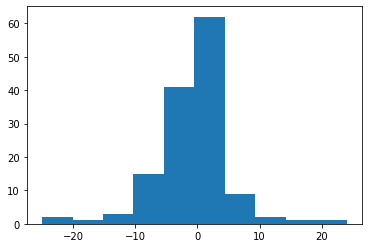

In [67]:
plt.hist(df_delt_rest['july_rest']-df_delt_rest['april_rest'])

(array([ 1.,  3.,  5., 80., 28., 13.,  4.,  2.,  0.,  1.]),
 array([-22. , -16.2, -10.4,  -4.6,   1.2,   7. ,  12.8,  18.6,  24.4,
         30.2,  36. ]),
 <BarContainer object of 10 artists>)

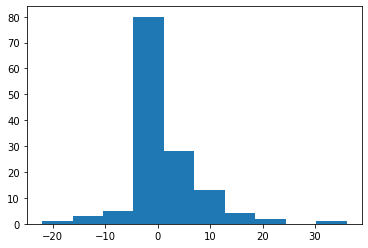

In [84]:
plt.hist(df_delt_rest['april_rest']-df_delt_rest['jan_rest'])

In [119]:
from scipy import stats
#Studnt, n=999, p<0.05, 2-tail

In [122]:
import math

In [132]:
sgd_mean_std=(df_delt_rest['april_rest']-df_delt_rest['jan_rest']).std(ddof=1)/math.sqrt(len(df_delt_rest))
sgd_mean=sum(df_delt_rest['april_rest']-df_delt_rest['jan_rest'])/len(df_delt_rest)

In [136]:
sgd_mean_std1=(df_delt_rest['july_rest']-df_delt_rest['april_rest']).std(ddof=1)/math.sqrt(len(df_delt_rest))
sgd_mean1=sum(df_delt_rest['july_rest']-df_delt_rest['april_rest'])/len(df_delt_rest)

In [133]:
sgd_mean

1.2992700729927007

In [126]:
from statsmodels.stats.weightstats import  _tconfint_generic

In [134]:
 _tconfint_generic(sgd_mean, sgd_mean_std, len(df_delt_rest) - 1,0.05, 'two-sided')

(0.20482552595500825, 2.3937146200303934)

In [137]:
 _tconfint_generic(sgd_mean1, sgd_mean_std1, len(df_delt_rest) - 1,0.05, 'two-sided')

(-1.712936119636026, 0.22388502474551508)

In [ ]:
# Проверить стат значимость

In [88]:
df_delt_rest=gpd.GeoDataFrame(df_delt_rest.merge(fish_5km, left_on='5km_id', right_on='id'), geometry='geometry')

In [90]:
df_delt_rest

5km_id  july_rest  april_rest  jan_rest          left           top  \
0         1         36          39        39  4.159722e+06  7.540673e+06   
1         2          5           3         3  4.159722e+06  7.535673e+06   
2         3         82          80        81  4.159722e+06  7.530673e+06   
3         4         19          18        19  4.159722e+06  7.525673e+06   
4         5         41          39        41  4.159722e+06  7.520673e+06   
..      ...        ...         ...       ...           ...           ...   
132     147         79          82        85  4.209722e+06  7.510673e+06   
133     148         62          64        63  4.209722e+06  7.505673e+06   
134     149         59          61        63  4.209722e+06  7.500673e+06   
135     150         13          13        14  4.209722e+06  7.495673e+06   
136     151          1           1         1  4.209722e+06  7.490673e+06   

            right        bottom   id  \
0    4.164722e+06  7.535673e+06    1   
1    4.164722e+06  7.530673e+06    2   
2    4.164722e+06  7.525673e+06    3   
3    4.164722e+06  7.520673e+06    4   
4    4.164722e+06  7.515673e+06    5   
..            ...           ...  ...   
132  4.214722e+06  7.505673e+06  147   
133  4.214722e+06  7.500673e+06  148   
134  4.214722e+06  7.495673e+06  149   
135  4.214722e+06  7.490673e+06  150   
136  4.214722e+06  7.485673e+06  151   

                                              geometry  
0    POLYGON ((4159722.469 7540673.086, 4164722.469...  
1    POLYGON ((4159722.469 7535673.086, 4164722.469...  
2    POLYGON ((4159722.469 7530673.086, 4164722.469...  
3    POLYGON ((4159722.469 7525673.086, 4164722.469...  
4    POLYGON ((4159722.469 7520673.086, 4164722.469...  
..                                                 ...  
132  POLYGON ((4209722.469 7510673.086, 4214722.469...  
133  POLYGON ((4209722.469 7505673.086, 4214722.469...  
134  POLYGON ((4209722.469 7500673.086, 4214722.469...  
135  POLYGON ((4209722.469 7495673.086, 4214722.469...  
136  POLYGON ((4209722.469 7490673.086, 4214722.469...  

[137 rows x 10 columns]

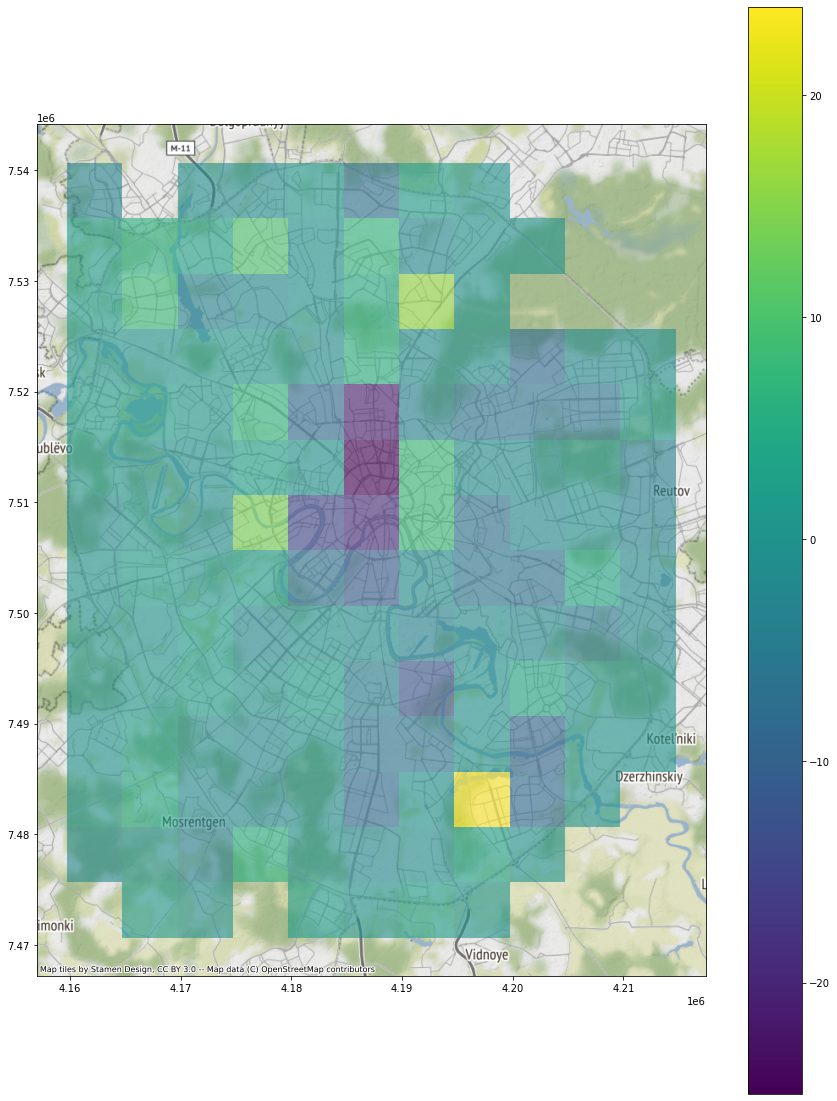

In [101]:
fig, ax = plt.subplots(figsize=(15,20))
df_delt_rest.plot(column=(df_delt_rest['july_rest']-df_delt_rest['april_rest']), alpha=0.6, ax=ax, legend=True)
ctx.add_basemap(ax)

In [106]:
df_rests=df_1404.merge(df_1407[['ID','SeatsCount']], how='left',on='ID')
df_rests['is_open']=df_rests['SeatsCount_y'].apply(lambda x: 0 if pd.isnull(x)else 1)

In [108]:
df_rests['is_open'].value_counts(normalize=True)

1    0.953407
0    0.046593
Name: is_open, dtype: float64

In [116]:
df_rests=df_rests[df_rests.within(mkad)]

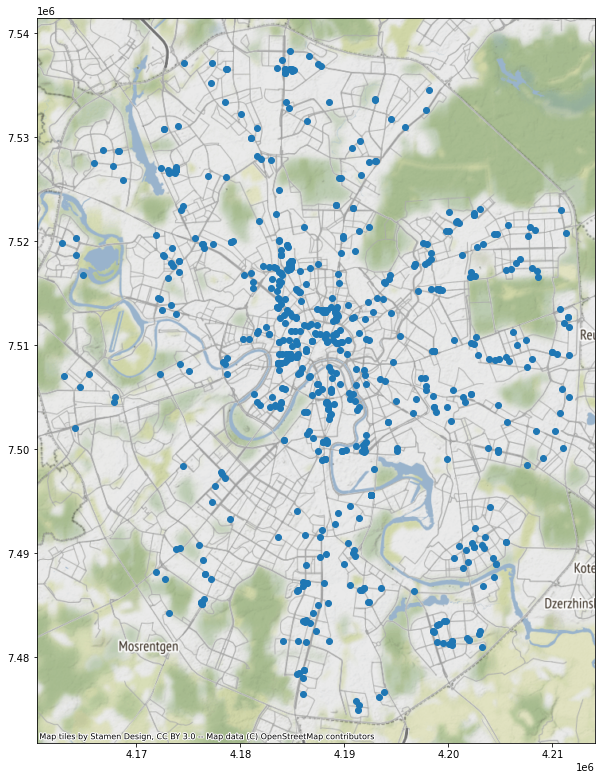

In [117]:
ax=df_rests[df_rests['is_open']==0].to_crs(epsg='3857').plot(figsize=(10,15))
ctx.add_basemap(ax)

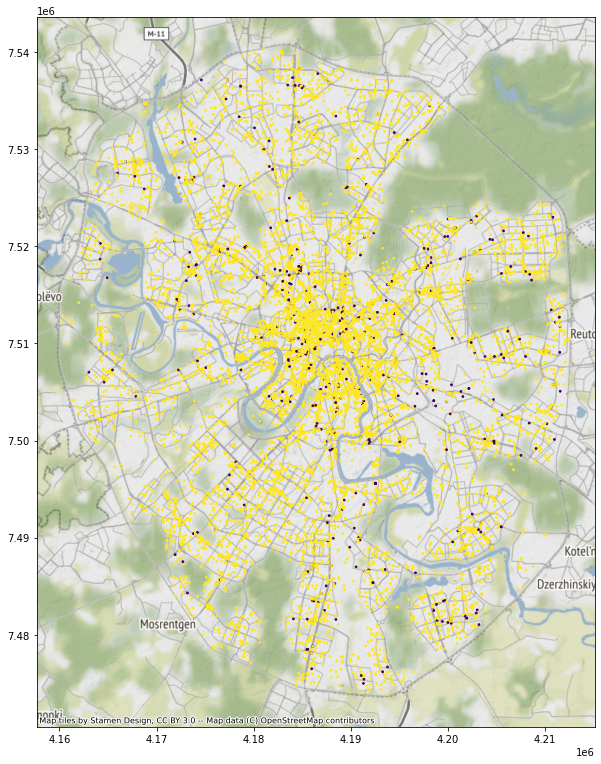

In [146]:
ax=df_rests.to_crs(epsg='3857').plot(figsize=(10,15), column='is_open', markersize=3)
ctx.add_basemap(ax)

In [148]:
df_rests

ID                                               Name  \
0       00151635                                            СМЕТАНА   
1      000077874                                             Родник   
2      000024309                                    Кафе «Академия»   
3       00119365                          Cotto Итальянская Кофейня   
4      000027429  ГБОУ «Школа № 1430 имени Героя Социалистическо...   
...          ...                                                ...   
16478   00263395                                       Азбука вкуса   
16479   00085639                                        Шоколадница   
16480   00266770                                        Шоколадница   
16481   00262997                                        Шоколадница   
16482   00272364                                        Шоколадница   

        global_id IsNetObject OperatingCompany                 TypeObject  \
0       637376221         нет                                        кафе   
1       637376331         нет                                        кафе   
2       637376349         нет                                        кафе   
3       637376403         нет                                   кафетерий   
4       637376480         нет                                    столовая   
...           ...         ...              ...                        ...   
16478  1034729276          да     Азбука Вкуса  магазин (отдел кулинарии)   
16479  1034729278          да      Шоколадница                       кафе   
16480  1034729284          да      Шоколадница                       кафе   
16481  1034729286          да      Шоколадница                       кафе   
16482  1034729292          да      Шоколадница                       кафе   

                                       AdmArea            District  \
0      Северо-Восточный административный округ   Ярославский район   
1           Центральный административный округ     Таганский район   
2           Центральный административный округ     Таганский район   
3      Северо-Восточный административный округ     район Лианозово   
4      Северо-Восточный административный округ     район Лианозово   
...                                        ...                 ...   
16478  Северо-Восточный административный округ  Алексеевский район   
16479       Центральный административный округ     Таганский район   
16480          Западный административный округ       район Раменки   
16481             Южный административный округ   Даниловский район   
16482       Центральный административный округ      Тверской район   

                                                 Address      PublicPhone  \
0             город Москва, улица Егора Абакумова, дом 9  (499) 183-14-10   
1      город Москва, улица Талалихина, дом 2/1, корпус 1  (495) 676-55-35   
2              город Москва, Абельмановская улица, дом 6  (495) 662-30-10   
3      город Москва, Абрамцевская улица, дом 9, корпус 1  (499) 200-00-22   
4                  город Москва, Угличская улица, дом 17  (499) 908-06-15   
...                                                  ...              ...   
16478               город Москва, проспект Мира, дом 112     нет телефона   
16479  город Москва, Таганская улица, дом 29, строение 1  (964) 577-48-06   
16480          город Москва, проспект Вернадского, дом 6  (495) 644-34-88   
16481                    улица Ленинская Слобода, дом 26  (917) 517-44-20   
16482           город Москва, площадь Революции, дом 2/3     нет телефона   

      SeatsCount_x SocialPrivileges      Longitude_WGS84       Latitude_WGS84  \
0               48              нет  37.7145650004360390  55.8790015313033730   
1               35              нет  37.6733061300344000  55.7382386551547000   
2               95              нет  37.6696475969381000  55.7355114718314000   
3               40              нет  37.5723061316711200  55.9040863698490400   
4              240              нет  37.5669400000000020  55.9040

In [154]:
df_delt_rest['close_share']=(df_delt_rest['april_rest']-df_delt_rest['july_rest'])/df_delt_rest['april_rest']

(array([ 1.,  0.,  0.,  0.,  1., 10., 97., 27.,  0.,  1.]),
 array([-0.66666667, -0.56666667, -0.46666667, -0.36666667, -0.26666667,
        -0.16666667, -0.06666667,  0.03333333,  0.13333333,  0.23333333,
         0.33333333]),
 <BarContainer object of 10 artists>)

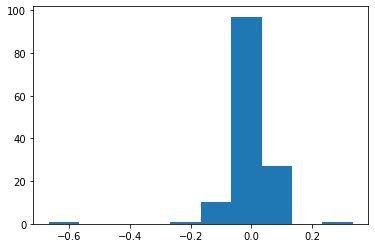

In [155]:
plt.hist(df_delt_rest['close_share'])

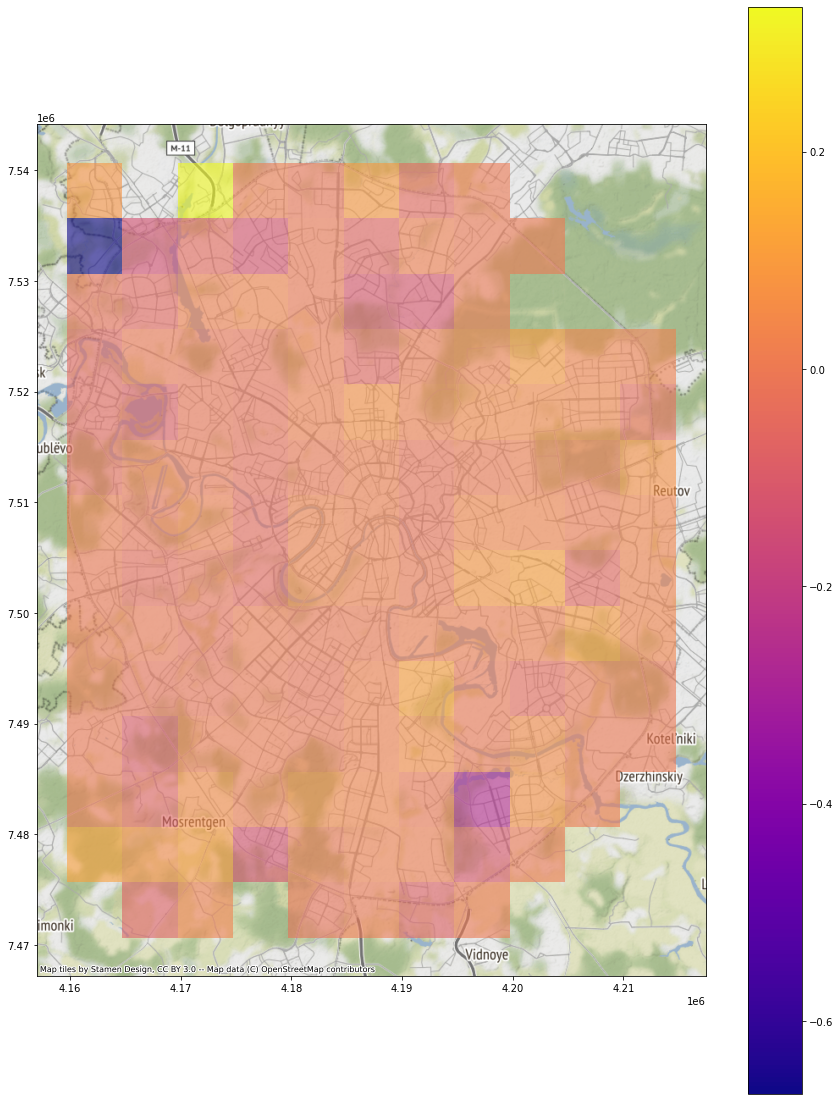

In [156]:
fig, ax = plt.subplots(figsize=(15,20))
df_delt_rest.plot(column=df_delt_rest['close_share'], alpha=0.6, ax=ax, legend=True,cmap='plasma')
ctx.add_basemap(ax)

In [167]:
df_rests['3km_buff']=df_rests.to_crs(epsg=3857).buffer(3000)
# df_tourist.head()

In [170]:
df_tourist.to_crs(epsg=3857).loc[0]

geometry    POINT (4185979.89645213 7508142.322656537)
facility                                        museum
name                                     Музей Рерихов
Name: 0, dtype: object

In [178]:
df_rests.to_crs(epsg=3857)['geometry'].apply(lambda x: min(x.distance(df_tourist.to_crs(epsg=3857))))

AttributeError: 'GeoDataFrame' object has no attribute '_geom'

In [180]:
g_vdnh.nodes

NameError: name 'g_vdnh' is not defined

In [ ]:
# find the centermost node and then project the graph to UTM
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
x, y = gdf_nodes['geometry'].unary_union.centroid.xy
center_node = ox.get_nearest_node(G, (y[0], x[0]))
G = ox.project_graph(G)

In [ ]:
# add an edge attribute for time in minutes required to traverse each edge
meters_per_minute = travel_speed * 1000 / 60 #km per hour to m per minute
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute